In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_market_data=StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']])

In [5]:
# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_market_data, columns=['price_change_percentage_24h', 'price_change_percentage_7d',
                                       'price_change_percentage_14d', 'price_change_percentage_30d',
                                       'price_change_percentage_60d', 'price_change_percentage_200d',
                                       'price_change_percentage_1y'])

# Copy the crypto names from the original data
scaled_market_data_df['Crypto_names'] = market_data_df.index

# Set the coinid column as index
scaled_market_data_df=scaled_market_data_df.set_index('Crypto_names')

# Display sample data
scaled_market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
Crypto_names,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k=list(range(1,11))

# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(scaled_market_data_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_data_df.head()

c:\Apps\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Apps\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Apps\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Apps\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

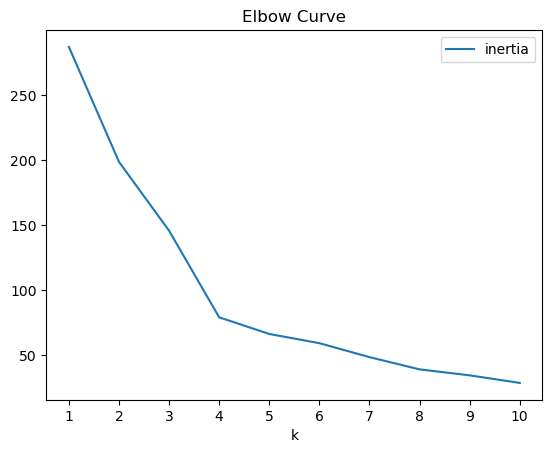

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = elbow_data_df.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

elbow_plot

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
model=KMeans(n_clusters=4,random_state=0)


In [9]:
# Fit the K-Means model using the scaled data
model.fit(scaled_market_data_df)

c:\Apps\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
model_prediction = model.predict(scaled_market_data_df)

# View the resulting array of cluster values.
model_prediction

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [11]:
# Create a copy of the DataFrame
market_scaled_prediction_df=scaled_market_data_df.copy()

In [12]:
# Add a new column to the DataFrame with the predicted clusters
market_scaled_prediction_df['clusterinfo']=model_prediction

# Display sample data
market_scaled_prediction_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusterinfo
Crypto_names,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: title={'center': 'Cryptocurrency Price Change Percentage'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

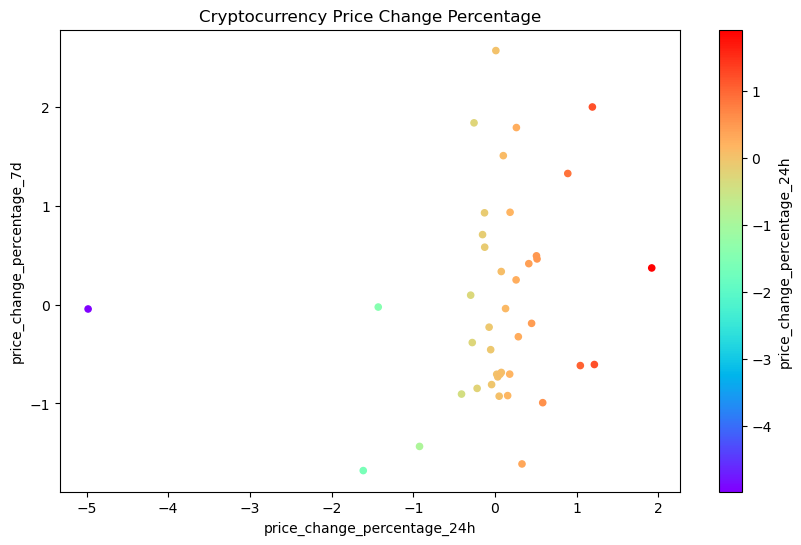

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_market_data_plot=market_scaled_prediction_df.plot.scatter(
                    x="price_change_percentage_24h",
                    y="price_change_percentage_7d",
                    c='price_change_percentage_24h', 
                    colormap='rainbow', 
                    title="Cryptocurrency Price Change Percentage",
                    figsize=(10, 6)
                )

scaled_market_data_plot

### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pcaModel=PCA(n_components=3)

In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca=pcaModel.fit_transform(market_data_df)

# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[-341.80096268,  -51.36677548,   12.52547089],
       [-249.42046633,   24.11754777,  -14.23146597],
       [-402.61472077, -118.71073742,   24.83839662],
       [-406.75243715,  -79.48728629,    1.56633057],
       [-382.42994789, -103.43195906,   16.75307273]])

In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pcaModel.explained_variance_ratio_

array([9.76037313e-01, 2.30282949e-02, 7.48308214e-04])

In [17]:
total_explained_variance = np.sum(pcaModel.explained_variance_ratio_)
total_explained_variance

0.9998139161298989

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 99%

In [18]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_pca_df = pd.DataFrame(
    market_data_pca,
    columns=["PCA1", "PCA2" , "PCA3"]
)

# Copy the crypto names from the original data
market_pca_df["Crypto_names"]=market_data_df.index

# Set the coinid column as index
market_pca_df=market_pca_df.set_index('Crypto_names')

# Display sample data
market_pca_df.head()


,PCA1,PCA2,PCA3
Crypto_names,,,
bitcoin,-341.800963,-51.366775,12.525471
ethereum,-249.420466,24.117548,-14.231466
tether,-402.614721,-118.710737,24.838397
ripple,-406.752437,-79.487286,1.566331
bitcoin-cash,-382.429948,-103.431959,16.753073


### Find the Best Value for k Using the PCA Data

In [19]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_pca=list(range(1,11))

# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k_pca:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(market_pca_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_pca': k_pca , 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow_pca.head()

c:\Apps\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Apps\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Apps\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Apps\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

,k_pca,inertia
0,1,6.997052e+07
1,2,8.180192e+06
2,3,2.580721e+06
3,4,8.237471e+05
4,5,4.559213e+05


<Axes: title={'center': 'Elbow Curve'}, xlabel='k_pca'>

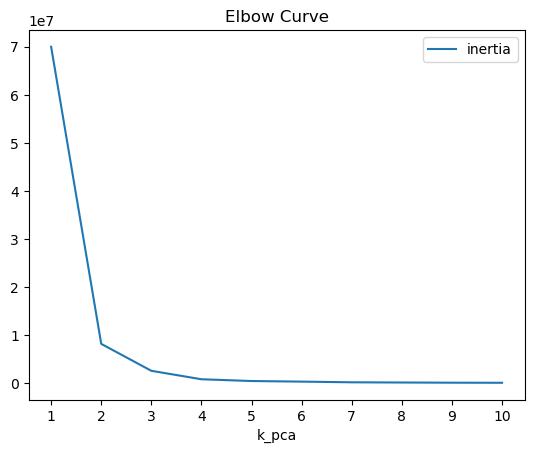

In [20]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_plot = df_elbow_pca.plot.line(
    x="k_pca", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
elbow_pca_plot

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 2


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes (k value was 4 and K_pca is 2)

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [21]:
# Initialize the K-Means model using the best value for k
pca_model = KMeans(n_clusters=2, random_state=0)

In [22]:
# Fit the K-Means model using the PCA data
pca_model.fit(market_pca_df)

c:\Apps\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [23]:
# Predict the clusters to group the cryptocurrencies using the PCA data
kpca_predict = pca_model.predict(market_pca_df)

# Print the resulting array of cluster values.
kpca_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
# Create a copy of the DataFrame with the PCA data
market_pca_prediction_df = market_pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
market_pca_prediction_df['pca_prediction']= kpca_predict

# Display sample data
market_pca_prediction_df.head()

,PCA1,PCA2,PCA3,pca_prediction
Crypto_names,,,,
bitcoin,-341.800963,-51.366775,12.525471,0
ethereum,-249.420466,24.117548,-14.231466,0
tether,-402.614721,-118.710737,24.838397,0
ripple,-406.752437,-79.487286,1.566331,0
bitcoin-cash,-382.429948,-103.431959,16.753073,0


<Axes: title={'center': 'Scatter Plot of PCA1 vs PCA2'}, xlabel='PCA1', ylabel='PCA2'>

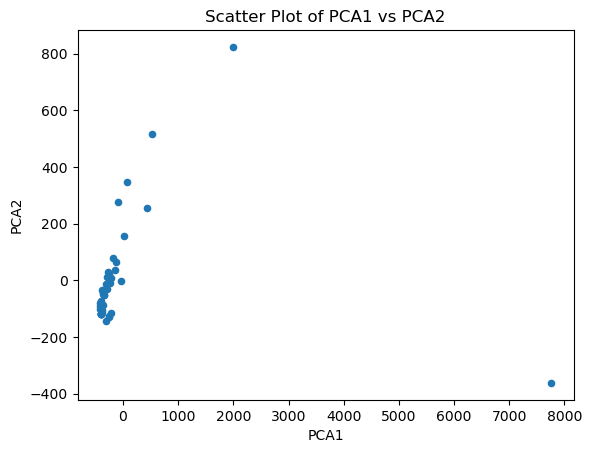

In [25]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
market_pca_plot=market_pca_prediction_df.plot.scatter(x='PCA1', y='PCA2', title='Scatter Plot of PCA1 vs PCA2', xlabel='PCA1', ylabel='PCA2')
market_pca_plot

### Determine the Weights of Each Feature on each Principal Component

In [27]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pcaModel.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=scaled_market_data_df.columns)
pca_component_weights


,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.001521,0.003933,0.013938
price_change_percentage_7d,-0.000197,-0.001289,-0.016462
price_change_percentage_14d,-0.000705,0.006577,0.126844
price_change_percentage_30d,0.000955,0.087961,0.377659
price_change_percentage_60d,0.008795,0.158367,0.899181
price_change_percentage_200d,0.300266,0.937599,-0.173684
price_change_percentage_1y,0.953813,-0.296700,0.046120


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** PC1-price_change_percentage_1y has the strongest and price_change_percentage_24h has negative
PCA-2 --> Strongest is price_change_percentage_200d and Negative is price_change_percentage_1y
PCA-3 --> stronges is price_change_percentage_60d and price_change_percentage_200d has negative.
    